##### Student Name: Nayem Alam
##### Student ID  : 260743549
##### Assignment 4

## Part 1 - Data Acquisition

- *Assume group image kept in the same folder as the jupyter notebooks
- *30 images are kept in another folder within the same folder as the notebooks

#### Explanation behind selecting individual images:
The challenges we face when detecting a face on a picture are: 
<ul>
    <li>Various viewpoints</li>
    <li>Illumination Variation</li>
    <li>Different skin colors</li>
    <li>Different facial expressions</li>
    <li>Occlusions (hair, hand, glasses, etc.)</li>
    <li>Face scales</li>
</ul>
- All images are in .JPG format. Most of the image faces are oriented in one direction and the lighting on those images are relatively similar. The skin colors of the actors stay the same with the exception of maybe one or two pictures (due to lighting). I also tried to get images that match the group photo, meaning I tried getting the same facial position with similar expressions, you will notice, some pictures do not exactly have same expression and face position (difficult to find many).
- I selected these images because they're positive images (face image only), the background for most of the pictures are stale and not too many things going on. There aren't any occlusions in the group image. As a result, it helps make it clear for face detection. I resized the images with [this tool](https://www.iloveimg.com/resize-image) with a smaller size strictly around the faces. Found images are not greyscaled but will be done via openCV, greyscaling the images will reduce data to one dimension (as opposed to 3). These images were selected because it fits well with the conditions of the detection/classification methods.

#### References
1. Group photo: https://netflixupdate.com/cast-met-mother/
2. Individual photos:

<ul>
    <li>Barney:</li>
    <ol>
        <li>https://www.pinterest.ca/elkelutschstrum/neil-patrick-harris/</li>
        <li>https://www.pinterest.ca/elkelutschstrum/neil-patrick-harris/</li>
        <li>https://money.cnn.com/2015/05/11/media/nbc-upfronts-live/index.html</li>
        <li>https://www.geekgeneration.fr/les-orphelins-baudelaire-neil-patrick-harris-sera-le-comte-olaf/</li>
        <li>http://www.fanpop.com/clubs/neil-patrick-harris/images/1462743/title/neil-patrick-harris-photo</li>
        <li>https://www.tvguide.com/celebrities/neil-patrick-harris/167741/</li>
        <li>https://celebrityspeakersbureau.com/talent/neil-patrick-harris/</li>
        <li>https://www.imdb.com/name/nm0000439/</li>
        <li>https://www.guiadelocio.com/cine/personajes/neil-patrick-harris</li>
        <li>http://www.hollywood.com/general/neil-patrick-harris-done-with-unfortunate-events-after-season-three-60712926/</li>
    </ol>
</ul>

<ul>
    <li>Robin:</li>
    <ol>
        <li>http://newhairstylez.com/cobie-smulders-hairstyles/</li>
        <li>http://the-fantasy-odyssey.wikia.com/wiki/File:Cobie_Smulders.jpg</li>
        <li>https://thefilmstage.com/news/cobie-smulders-joining-the-avengers/</li>
        <li>https://www.thefashionspot.com/beauty/173625-cobie-smulders-beauty-look-of-the-week/</li>
        <li>https://www.esquireme.com/women/cobie-smulders-woman-love</li>
        <li>http://www.fanpop.com/clubs/cobie-smulders/images/2616431/title/cobie-wallpaper</li>
        <li>http://www.zimbio.com/photos/Cobie+Smulders/Arrivals+Iron+Man+3+Premiere+3/n-JZiX9sUlP</li>
        <li>https://www.thehairstyler.com/hairstyles/formal/medium/wavy/cobie-smulders</li>
        <li>http://www.justjared.com/photo-gallery/3920560/cobie-smulders-friends-from-college-cast-reunite-in-nyc-ahead-of-netflix-debut-16/</li>
        <li>https://www.promiflash.de/thema/cobie-smulders/</li>
    </ol>
</ul>

<ul>
    <li>Lily:</li>
    <ol>
        <li>https://www.efrisuren.eu/frisuren-der-promis/&zoom=2662</li>
        <li>https://www.hairfinder.com/celeba/hairstyle-alyson-hannigan6.htm</li>
        <li>https://www.womenshealthmag.com/life/a19932994/alyson-hannigan-interview/</li>
        <li>https://celebritypets.net/pet-worth/alyson-hannigan-pets/</li>
        <li>https://www.hollywoodreporter.com/live-feed/alyson-hannigan-star-cbs-matt-680488</li>
        <li>http://www.zimbio.com/pictures/JKD5SoZaMsx/Arrivals+Women+Entertainment+Breakfast/Alyson+Hannigan</li>
        <li>https://www.popsugar.com/Alyson-Hannigan</li>
        <li>https://www.tvserial.it/buffy-revival-alyson-hannigan-a-favore-video/</li>
        <li>https://www.thehairstyler.com/hairstyles/casual/medium/wavy/Alyson-Hannigan-casual-side-parted-hairstyle</li>
        <li>http://www.zimbio.com/pictures/rhuWAf7HYH9/Much+Ado+Nothing+Screening</li>
    </ol>
</ul>

## Part 2 - Eigenvector Representation

### a) Use PCA to find the eigenvector representation of your training data.

MEAN AND PCA IMAGES


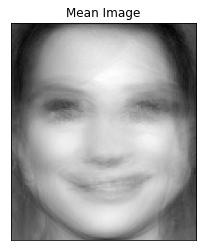

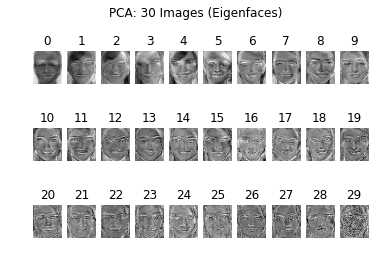

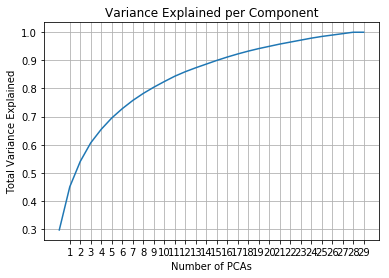

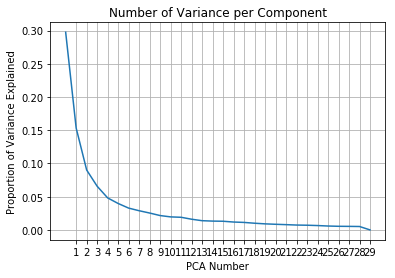

array( [2.97576882e-01 1.53337530e-01 9.02010434e-02 6.57378829e-02
 4.81876800e-02 3.97895331e-02 3.28351228e-02 2.88831574e-02
 2.54188982e-02 2.16127400e-02 1.96074595e-02 1.90178129e-02
 1.60990167e-02 1.38854722e-02 1.32758305e-02 1.30458354e-02
 1.18662349e-02 1.12760461e-02 1.00691645e-02 9.12083173e-03
 8.47766905e-03 7.93699966e-03 7.32138154e-03 7.06848804e-03
 6.57040087e-03 5.86176292e-03 5.44625944e-03 5.32927082e-03
 5.14359373e-03 5.86866921e-32] )


In [17]:
import numpy as np
import cv2 
import os # os commands
from matplotlib import pyplot as plt
import os.path
import glob
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# load directories and index files (N.B.images were already resized using https://www.iloveimg.com/compress-image) - 270x316
image = "./training_set/"

# # load directory and index files
data,matrix,avg = [],[],[]
files = os.listdir(image)

# find all images in directory
for img in files:
    data_path = os.path.join(image,img)
    data.append(data_path)
    data_array = np.array(data)
    #print(type(data_array)) #just to make sure its an array


"""Use PCA to find the eigenvector representation of your training data"""
# convert images to grayscale (L)
img_array = np.array(Image.open(data[0]).convert('L'))
row,col = img_array.shape
# print("Dimensions of the resized images: ",img_array.shape)

# put images onto matrix
for i in data:
    # convert to grayscale
    perImg = np.array(Image.open(i).convert('L'))
    # 1D array
    thisMat = np.array(perImg).flatten()
    matrix.append(thisMat)
trained = np.array(matrix) #list back to array

# Compute PCA
mean, eigvec = cv2.PCACompute(trained, mean=None)
avg = mean.reshape(row,col) # mean

# Plot Mean and PCA Images(s)
print("MEAN AND PCA IMAGES")
plt.imshow(avg, cmap = "gray")
plt.title("Mean Image"), plt.xticks([]), plt.yticks([])
plt.show()

for i in range(len(trained)):
    plt.suptitle("PCA: 30 Images (Eigenfaces)")
    plt.subplot(3,10,i+1)
    plt.title(str(i)) # eigenfaces
    plt.imshow(eigvec[i].reshape(row,col),'gray')
    plt.axis('off')
plt.show()


"""finding covariance, eigenvalues and eigenvectors"""
# help from http://www.xiaoliangbai.com/2016/09/07/applying-pca-analysis-on-images, https://etav.github.io/python/scikit_pca.html

# center the data
mean_X = trained.mean(axis=0)
centeredM = trained - mean_X
# find covariance, eigenvalues and eigenvectors
cov = np.dot(centeredM, centeredM.T) # covariance 
eigenVals, eigenVecs = np.linalg.eigh(cov) # calculate eigenvalues and eigenvectors
reverse = eigenVals[::-1] # reverse to put in descending order
#     print("array(",reverse,")")

""" Plot the variance explained by every vector in descending order"""
covar_matrix = PCA(n_components = 30) # 30 features
covar_matrix.fit(trained)
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios 
var=np.cumsum(np.round(variance, decimals=3))

# Plot the variance explained in descending order
plt.plot(var) # same thing as plotting 'reverse' variable (decided to use 'variance' bc of accuracy)
plt.xlabel('Number of PCAs')
plt.ylabel('Total Variance Explained')
plt.title('Variance Explained per Component')
plt.xticks(np.arange(1, 30, 1.0))
plt.grid(True)
plt.show() 

plt.plot(variance) # same thing as plotting 'reverse' variable (decided to use 'variance' bc of accuracy)
plt.xlabel('PCA Number')
plt.ylabel('Proportion of Variance Explained')
plt.title('Number of Variance per Component')
plt.xticks(np.arange(1, 30, 1.0))
plt.grid(True)
plt.show() 

# array of features
print("array(",variance,")")



### Explanation of two plots above
    1. Variances explained per component

The first plot (1), is the answer to the question (plot total variance explained vs. number of PCAs). This tells you at component one the variance explained is ~0.4, and the next component (PCA 2) retains more information with a variance explained of ~0.55. As we go up to the 30th PCA, you can see, if we cummulatively add all the variances together, at component 30, the variance explains ~1 (retaining mostly all info). <br>
    
    2. Number of Variance per Component
 
The second plot (2), is there to show the variances at each component. Component 1 has variance ~0.15, 2 has variance of ~0.08 and so on.


### c) Do you need all the vectors to represent the data?
No, we do not need all the vectors. From our second plot (number of variances per component) we can see that the first 15 components contains 90% of the total variance (90% is explained on plot 1 as well).

### d) How well-clustered is your data? 

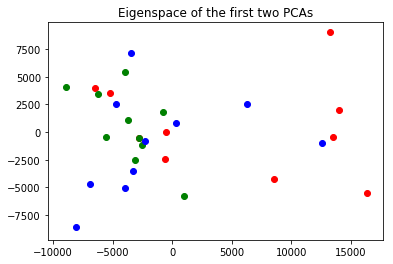

In [18]:
# determine clusters
pca = PCA(n_components=30)
data = pca.fit_transform(trained)
mean = pca.mean_

# plot a sample cluster
"""
Color code:
R = robin
G = lily
B = Barney
"""
plt.figure()
plt.title("Eigenspace of the first two PCAs")
plt.scatter(data[0:10,0], data[0:10,2],color=['red']) 
plt.scatter(data[10:20,0], data[10:20,2],color=['green']) 
plt.scatter(data[20:30,0], data[20:30,2],color=['blue']) 
plt.show()


From plot number 2 (Number of Variance per Component), the first 2 containes the most number of variance. Most of the data points are distributed to the left of the plane. In terms of color, Robin is Red, Lily is Green and Barney is Blue. We can see clear overlappings between Barney and Lily, whereas Robin is more to the right of the plane. Since there are overlaps, it can cause some false positives. These overlaps can be due to various reasons, such as the lighting may be different or they have different skin tone.

### For every sample, find the nearest neighibour (L2 distance), and check whether it is of the same class.

- Original Pixel Space

In [19]:
data, label, averages = [],[],[]

# load directory again but with labels
imgFile = "./training_set/"
data_path = os.path.join(imgFile,'*g')
files = glob.glob(data_path)

# find all images in directory
for img in files:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    filename = os.fsdecode(img)
    filepath = data_path + filename
    resized = cv2.resize(cv2.imread(img),(270,316))
    data.append(image) #list

    # Use class label 0 for 'lily', 1 for 'robin', 2 for 'barney'
    if 'lily' in filename:
        label.append(0)
    if 'robin' in filename:
        label.append(1)
    if 'barney' in filename:
        label.append(2)
        
# convert training images to array
data = np.asarray(data)

# print("training",data.shape)

# Find nearest neighbors of classifiers 2
"""n.b. When printing 'clf' we see p=2 (by default), i.e. calculates the euclidean_distance (L2)"""
clf = KNeighborsClassifier(n_neighbors=2) # k=2
train = data.reshape(30, -1)
clf.fit(train, label) # fitting the model
# print(clf)

# find predictions of Original Pixel Space
test = data.reshape(data.shape[0], -1)
predictions = clf.predict(test)

print("Predictions:\n",list(predictions))
print('Labels:\n', label)

# Find accuracy between our labels vs predictions
good,bad = 0,[]
for i in range(len(predictions)):
    if predictions[i] == label[i]:
        good += 1
    else:
        bad.append(i)
print("\nAccuracy:", good,"/30 = ","{:.2f}".format((good/30)*100),"%")
print("The inaccurate values are at position: ",bad)

Predictions:
 [2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2]
Labels:
 [2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2]

Accuracy: 26 /30 =  86.67 %
The inaccurate values are at position:  [4, 10, 17, 20]


- Eigenpace

In [20]:
thisTrain = train.copy()
thisPCA = PCA(n_components = 30)
thisPCA.fit_transform(thisTrain) # in order to return fit.transform

# put images in eigenspace (eigenspace training image)
eigTrain = thisPCA.transform(thisTrain)
# print(len(eigSpace))

# Find nearest neighbors of classifiers 2
clfE = KNeighborsClassifier(n_neighbors=2) # k=2
clfE.fit(eigTrain, label) # fitting the model

# find predictions of Eigenspace
eigSpace = eigTrain.reshape(data.shape[0], -1)
predictionsE = clfE.predict(eigSpace)

print("Predictions:\n",list(predictionsE))
print('Labels:\n', label)

# Find accuracy between our labels vs predictions
good,bad = 0,[]
for i in range(len(predictionsE)):
    if predictionsE[i] == label[i]:
        good += 1
    else:
        bad.append(i)
print("\nAccuracy:", good,"/30 = ","{:.2f}".format((good/30)*100),"%")
print("The inaccurate values are at position: ",bad)


Predictions:
 [2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2]
Labels:
 [2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2]

Accuracy: 26 /30 =  86.67 %
The inaccurate values are at position:  [4, 10, 17, 20]


###  What fraction of your data has a neighbour of the same class?
26/30 = 86.67% 

###  Do this both in the original pixel space and the eigenspace, then compare the values; would you expect there to be a significant difference?
Both Original space and eigenspace came out to be the same with accuracy of 86.67%. I wouldn't expect there to be a significant difference as PCA retains most of the information. 

## Part 3 - Face Detection & Identification
### a) Use a sliding window to detect whether a section of the image contains a face. Set a threshold on the distance in eigenspace between the window contents and your training data.

(x, y), distance in eigenspace
((0, 0), 437601.6421230045)
((0, 300), 25723.050157201484)
((100, 0), 485544.0916446215)
((200, 300), 27319.1706481688)
((300, 0), 546729.1372290431)


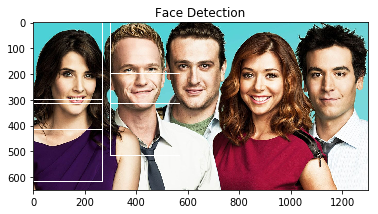

Smallest magnitude:  25723.050157201484

Seems as if two faces are being detected only - alot of false positives


In [21]:
# train are my training images (flattened)
faces,value,points =[],[],[]
# call group image
group_pic = cv2.imread('group.jpg')
grey_img = cv2.cvtColor(group_pic, cv2.COLOR_BGR2RGB)
img_array = np.asarray(grey_img) #put to array
h,w = trained.shape
# print("Trained shape:",trained.shape)

# compute this pca
pca = PCA(n_components = 30)
pca.fit_transform(trained)
eigenfaces = pca.components_
trainingMean = pca.mean_
# print(trained.ndim)

# window height and width
wh = [270,316] # trained images size
stepSize = 100
threshold = 30000
print("(x, y), distance in eigenspace")

# slide window across image
for x in range(0, group_pic.shape[0]-wh[0], stepSize):
    for y in range(0, group_pic.shape[0]-wh[1], stepSize):
        
        # create window
        window = grey_img[x:x + wh[0], y:y + wh[1]]
        window = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY) # grayscale = 1D
        # window = cv2.resize(270,316)  # resize to training images
        window_pca = pca.transform(window.reshape(1,-1))

        # face space 
        face = eigenfaces*window_pca.T
        face = np.sum(face, axis=0) + trainingMean
        face = (window.flatten() - face)
        result = abs(np.sum(face, axis = 0))
        # print((result))
        value.append(result)
        
        # You will notice the thresholds are far off apart from one face to another
        # hence why I put thresholds at an interval [0,30000] U [400000, max]
        if(result < threshold or result > 400000):
            img = window.reshape(270,316)
            img = np.resize(window, (270,316))
            faces.append(img)
            points.append(((x,y), result))
            print(((x,y), result))
            cv2.rectangle(grey_img, (y, x), (y + wh[0], x + wh[1]), (255, 255, 255), 2) # draw rectangle on image

# plot image with rectangle box
plt.title("Face Detection"),plt.imshow(grey_img)
plt.show()
# print(max(result))

print("Smallest magnitude: ",min(value))
print("\nSeems as if two faces are being detected only - alot of false positives")


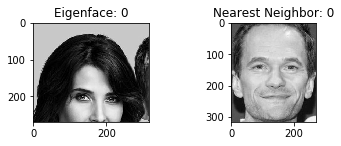

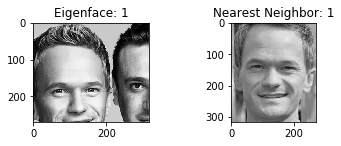

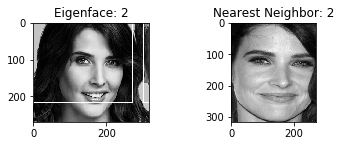

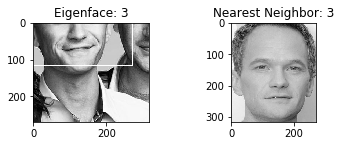

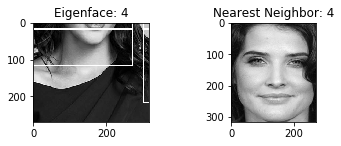

In [22]:
# find images that match closely with training images (nearest neighbor visually)
for i in range(len(faces)):
    ssd,index = [],[]
    
    normalFace =faces[i]
    plt.subplot(221)
    plt.imshow(normalFace, cmap = 'gray')
    plt.title("Eigenface: "+str(i))
    normalFace = np.resize(normalFace, (270,316))
    
    # eigenspaces
    weight = pca.transform(normalFace.reshape(1,-1)) 
    for j in range(len(eigTrain)):
        weightb = eigTrain[j]
        diff = np.power((weight-weightb),2)
        total = np.power(np.sum(diff, axis = 1), 1/2)
        ssd.append(total)
        index.append(j)
    img_min = index[ssd.index(min(ssd))]
    plt.subplot(222)
    plt.imshow(trained[img_min,:].reshape(row,col), cmap = 'gray')
    plt.title("Nearest Neighbor: " + str(i))
    plt.show()
    
    

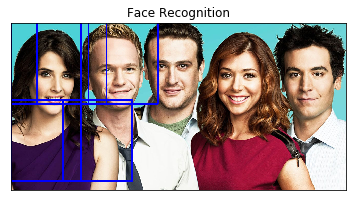

Recognizes Barney's face the most; Robin as well but detects her body as a face too...; Lily: doesn't recognize her.
Doesn't recognize Lily because she wasn't detected in the facial detecton section.


In [29]:
# close matches are 2,3 and 4
final_pts = [points[2]+points[3]+points[4]]

for point in points:
    for i, final_pt in enumerate(final_pts):
        diff_x = point[0][0]-final_pt[0][0]
        diff_y = point[0][1]-final_pt[0][1]
        if (diff_x <= 20 and diff_x >= -40) and (diff_y <= 20 and diff_y >= -10):
            if final_pt[1] > point[1]:
                final_pts[i] = point 
    final_pts.append(point)

for final_pt in final_pts:
    x, y = final_pt[0]
    cv2.rectangle(group_pic, (x,y), (x+wh[0], y+wh[1]), (255,0,0), 5)
    roi_gray = grey_img[y:y+wh[1], x:x+wh[0]]
    roi_color = grey_img[y:y+wh[1], x:x+wh[0]]

plt.imshow(cv2.cvtColor(group_pic, cv2.COLOR_BGR2RGB))
plt.title("Face Recognition"), plt.xticks([]), plt.yticks([])
plt.show()

print("Recognizes Barney's face the most; Robin as well but detects her body as a face too...; Lily: doesn't recognize her.")
print("Doesn't recognize Lily because she wasn't detected in the facial detecton section.")

## Part 4 - Viola-Jones Comparison
### a) Use an existing implementation of the Viola-Jones face detector, and compare the results with your detector

Faces found: 5


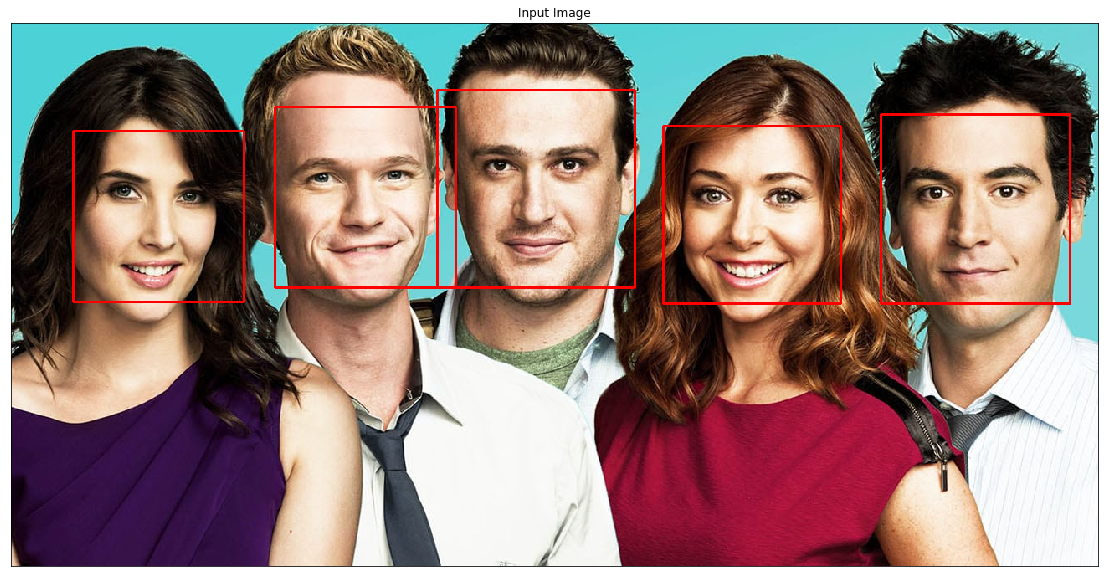

In [24]:
# with thanks to https://www.youtube.com/watch?v=fLveNZ49MnQ

# 'pip install opencv-contrib-python' to solve datapath issue
data_path = cv2.data.haarcascades
# print(data_path) # /anaconda3/lib/python3.6/site-packages/cv2/data/

group = cv2.imread('group.jpg')
# convert to grayscale
grey_img = cv2.cvtColor(group, cv2.COLOR_BGR2GRAY)

# use cascading classifier (lbp)
face_cascade = cv2.CascadeClassifier(os.path.join(data_path, 'lbpcascades', 'lbpcascade_frontalface.xml'))
faces = face_cascade.detectMultiScale(grey_img,scaleFactor=1.1, minNeighbors=5)

print("Faces found:", len(faces))

# print(face_cascade)

for(x,y,w,h) in faces:
    cv2.rectangle(group, (x,y), (x+w,y+h), (0,0,255),2)

# display images
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(group, cv2.COLOR_BGR2RGB))
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.show()

### How many false positives do you obtain?
There is only 1 false positive obtained. The face detector on the middle person presents an overlapping detection

- minNeighbors parameter controls the minimum number of detected bounding boxes in a given area for the region to be considered a face<sup>[1]('https://www.pyimagesearch.com/2016/06/20/detecting-cats-in-images-with-opencv/')</sup>. So by increasing this number we can eliminate false positives, however by increasing it we can also lose true positives too. In this case minNeighbors of 5 seem like a good number to detect all 5 faces in the picture given.


- scaleFactor parameter allows you to find faces of different sizes in a given image; if we set the value low, it increases the false-positive detection rate. Here the sizes of the faces aren't much distinct; no false-positives.

### Under what conditions would you expect the Viola-Jones detector to work when PCA does not?

One example would be: Detecting faces in a video. <br>
PCA classification removes variability without knowing which variables are most useful. Whereas, Viola-Jones scans a window across an image (capable of detecting a face) and has many interesting classification techniques, such as the cascading classifier. It reduces false-positive rates and reduces the speed by quickly rejecting regions that don't have a face (negatives)<sup>[2]('http://www.cse.psu.edu/~rtc12/CSE586/lectures/violaJonesDetector.pdf')</sup>.